In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cross_decomposition import PLSRegression
from adjustText import adjust_text


In [2]:
import os 
os.chdir('E:\\UOC NOTES\\4th year\\ST 4052 - Statistical Learning\\Project 2')

In [3]:
df1=pd.read_csv("churn-bigml-80.csv")
df2=pd.read_csv("churn-bigml-20.csv")
df= pd.concat([df1, df2], axis =0)

In [4]:
df.shape

(3333, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   f

In [6]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
(df.duplicated()).sum()

0

In [9]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

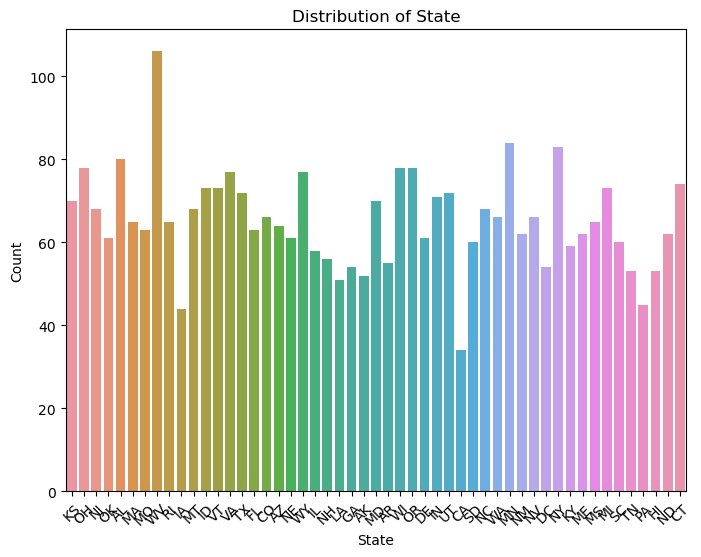

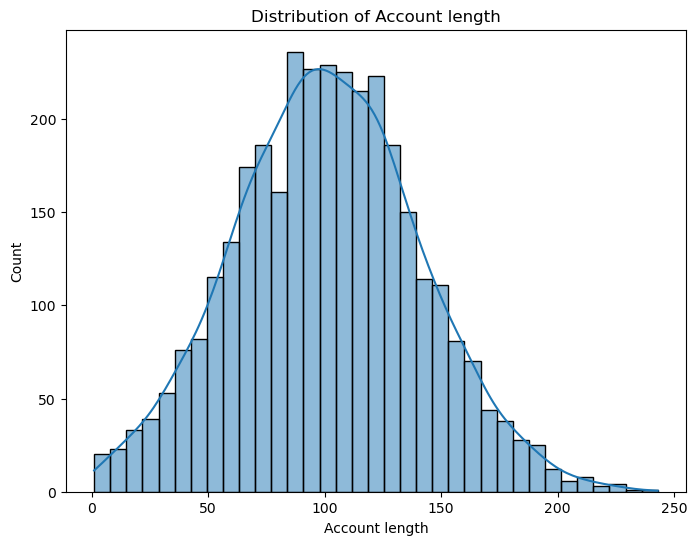

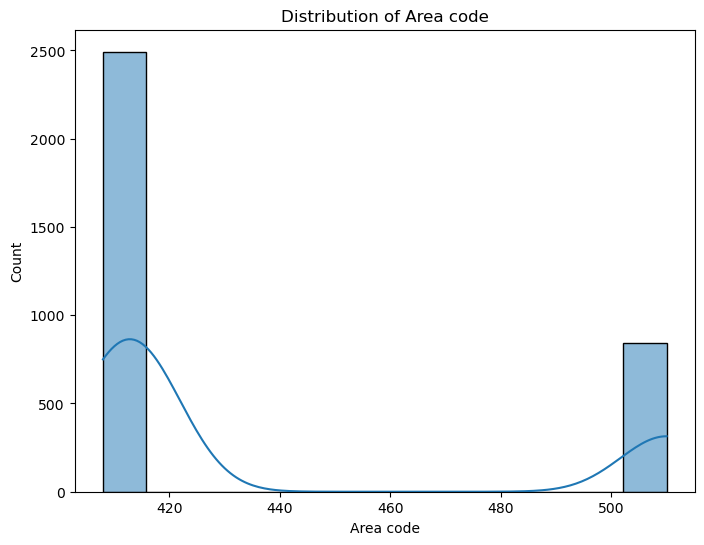

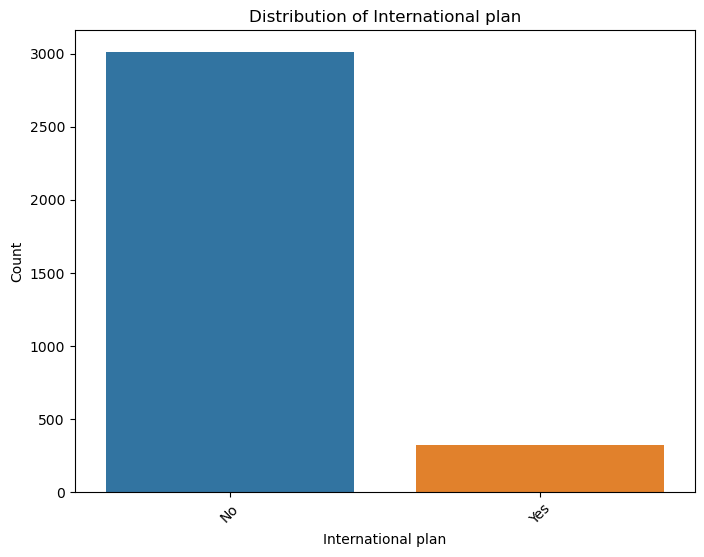

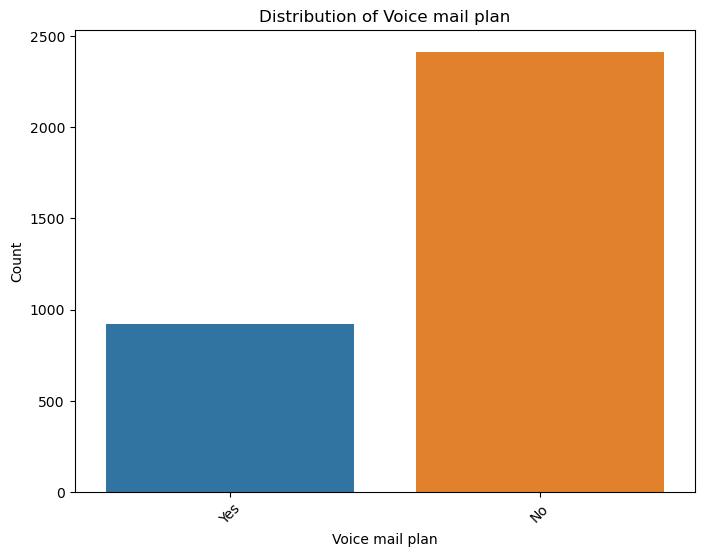

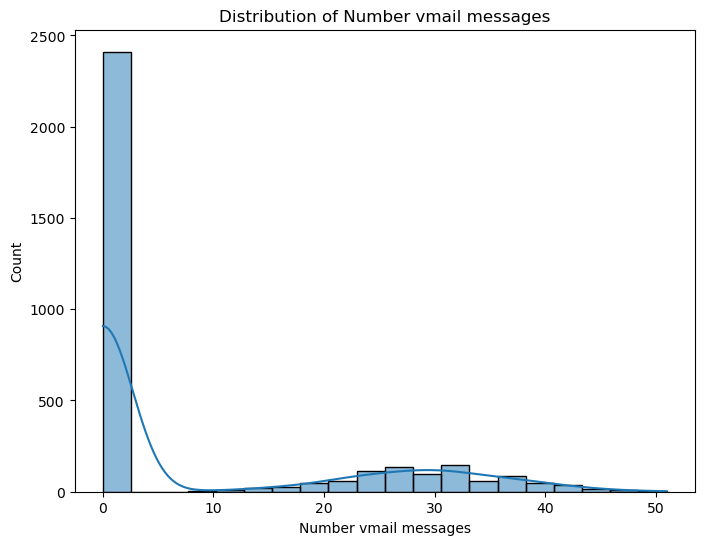

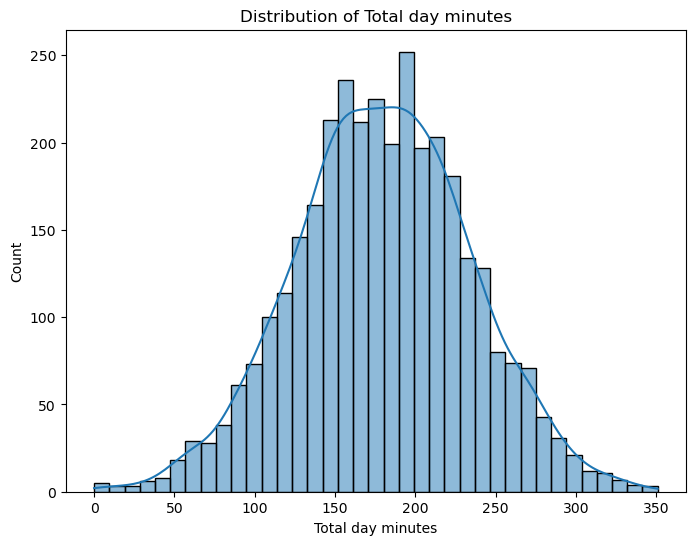

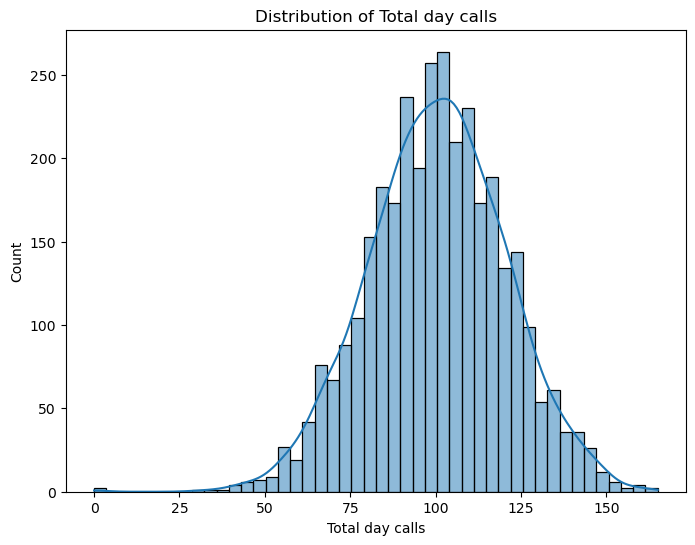

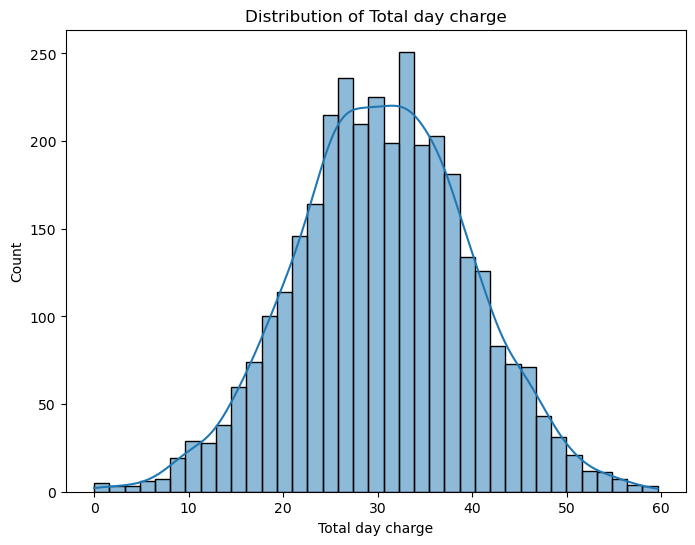

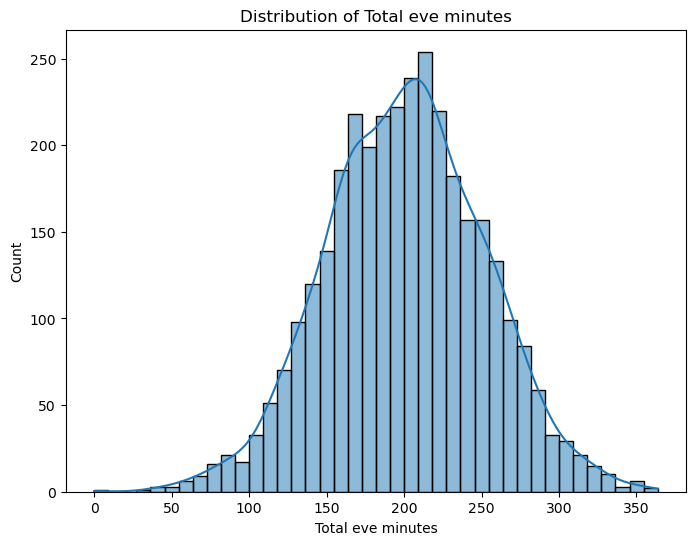

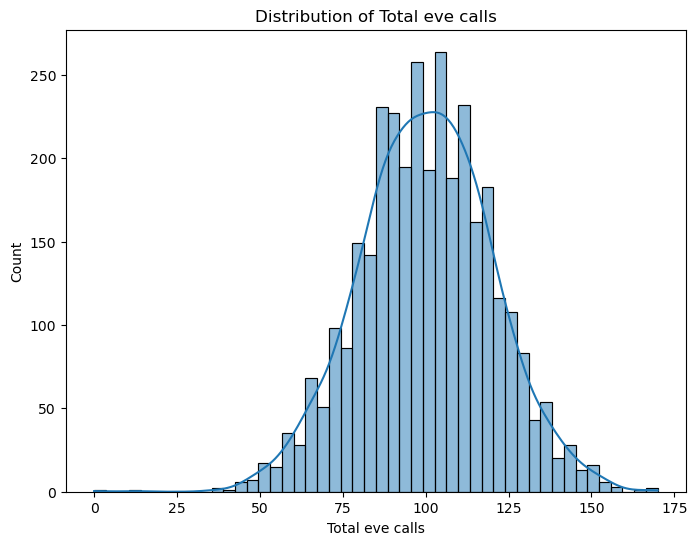

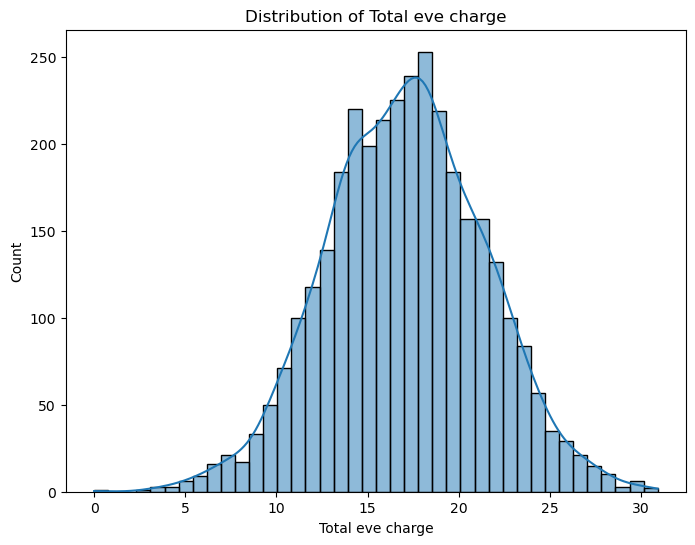

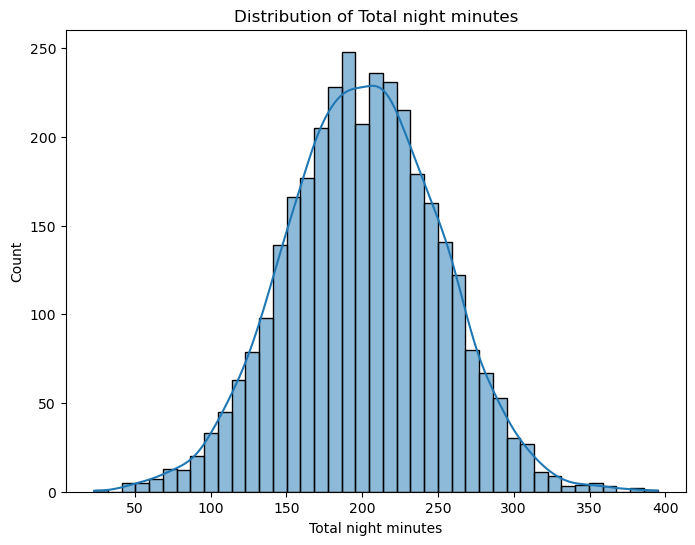

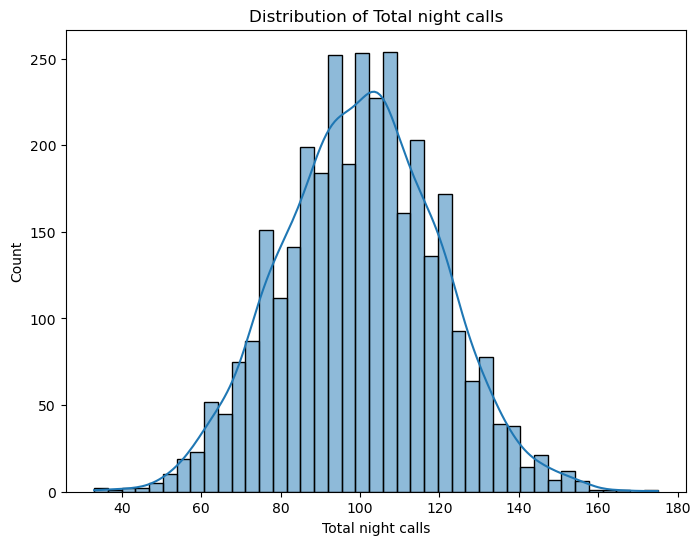

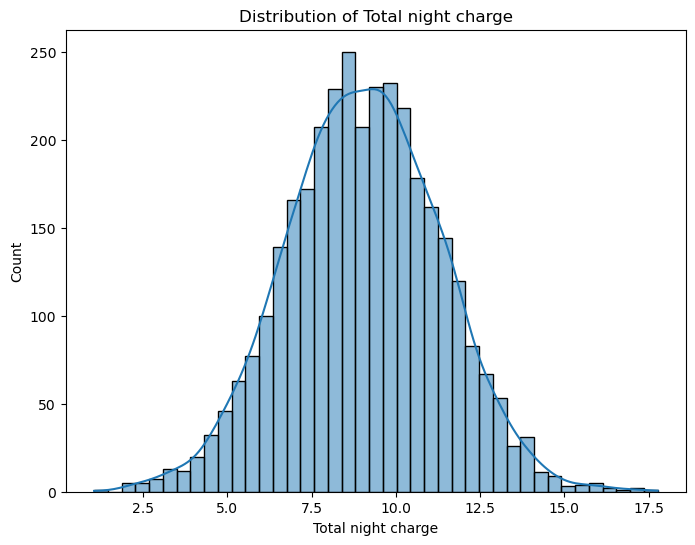

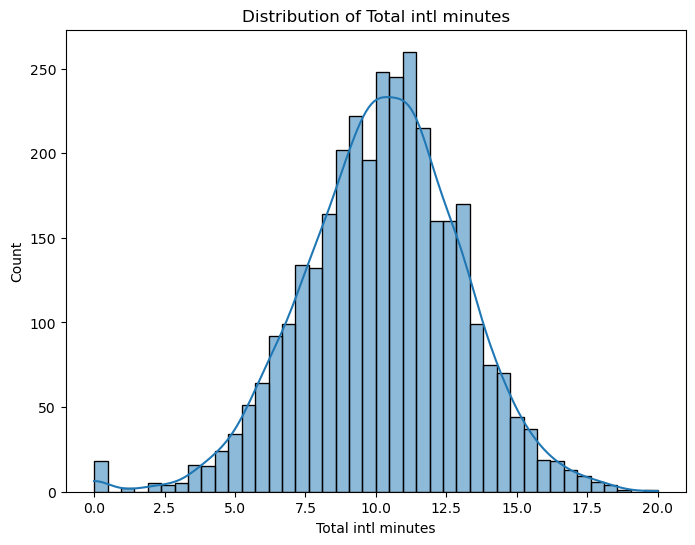

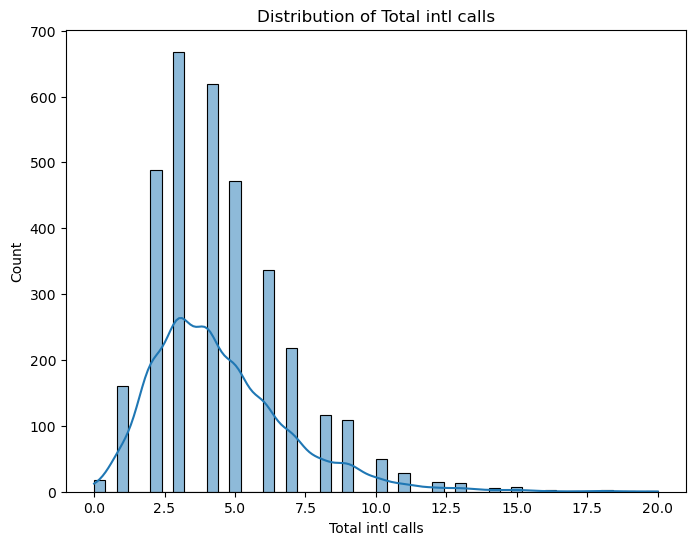

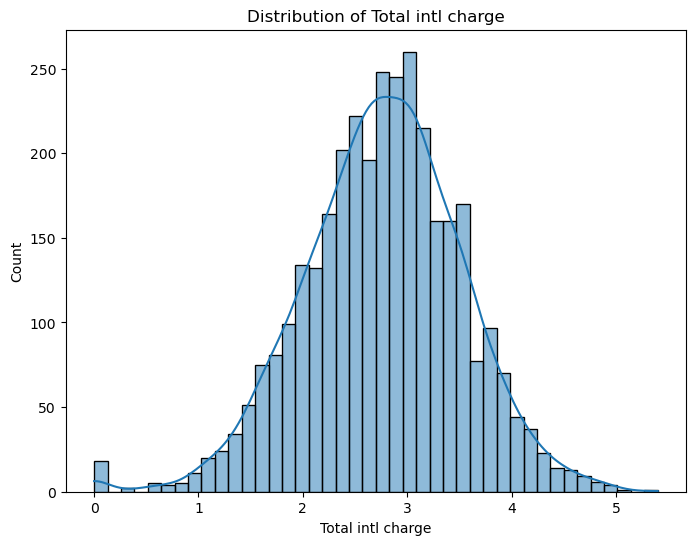

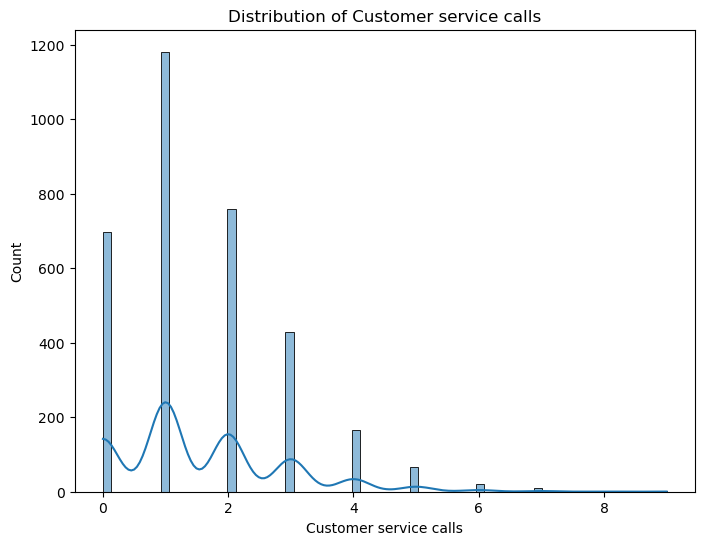

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


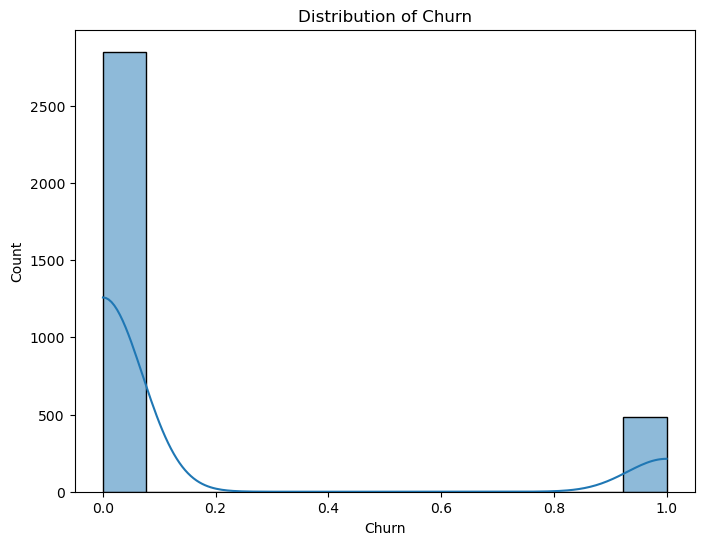

In [10]:
# Loop through each column in the DataFrame
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Set the figure size
    
    # Check the data type of the column
    if df[column].dtype == 'object':
        # For categorical variables, create a countplot
        sns.countplot(x=column, data=df)
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        
    else:
        # For continuous variables, create a distribution plot
        sns.histplot(df[column], kde=True)
    
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [11]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [12]:
df['State'].nunique()

51

In [13]:
df_copy = df.copy()

In [14]:
df_copy['Area code'] = df_copy['Area code'].astype(str)

In [15]:
df_copy['Area code'].unique()

array(['415', '408', '510'], dtype=object)

In [16]:
# Create a dictionary to map area codes to regions
area_code_to_region = {
    '415' : 'San Francisco Bay Area',
    '408' : 'Santa Clara Valley',
    '510' : 'Eastern Bay Area'
}

# Create a new column 'region' based on the area code
df_copy['Area code'] = df_copy['Area code'].map(area_code_to_region)


In [17]:
# Drop the column 'State'
df_copy = df_copy.drop('State', axis=1)

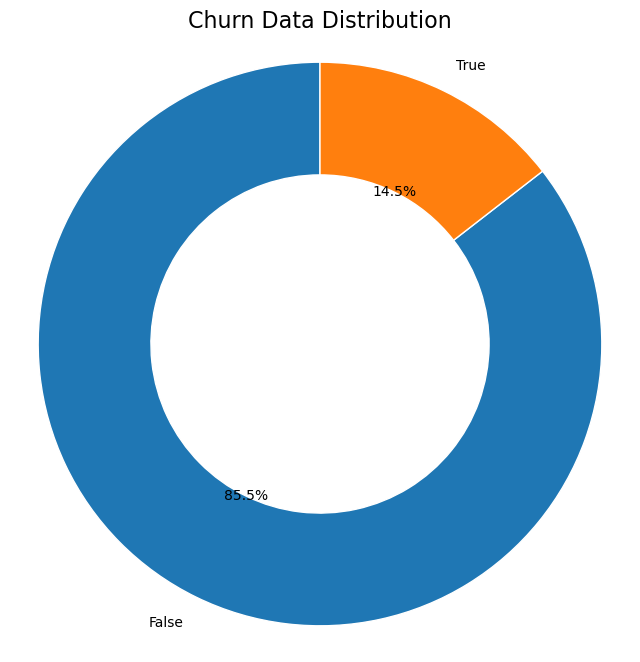

In [18]:
# Step 1: Calculate the churn counts or proportions
churn_counts = df['Churn'].value_counts()
total_churns = churn_counts.sum()
churn_proportions = churn_counts / total_churns * 100

# Step 2: Create the donut chart
plt.figure(figsize=(8, 8))

# Outer circle (donut)
plt.pie([100], colors='white', radius=0.7, wedgeprops=dict(width=0.3, edgecolor='w'))

# Inner circle (churn categories)
plt.pie(churn_proportions, labels=churn_counts.index, autopct='%.1f%%', startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='w'))

plt.title('Churn Data Distribution', fontsize=16)  # Increase title font size
plt.axis('equal')  # Equal aspect ratio ensures a circular shape

# Increase label font size
plt.rcParams['font.size'] = 16

plt.show()


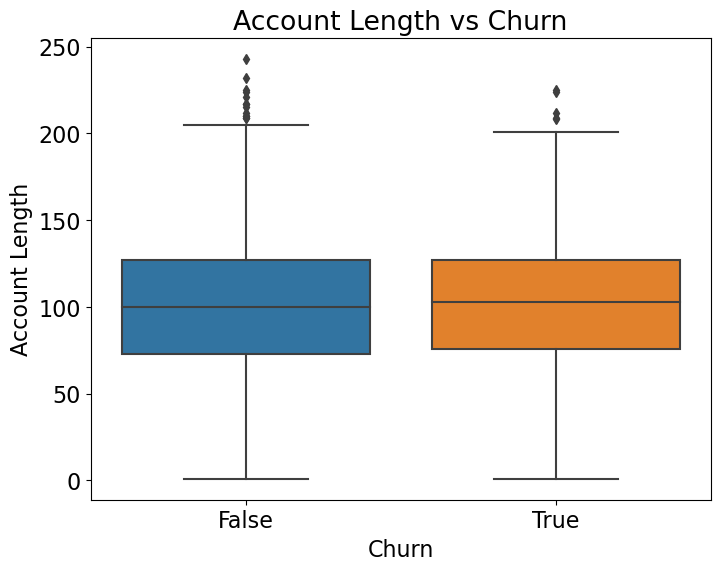

In [19]:
# Plot account length vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Account length', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Account Length')
plt.title('Account Length vs Churn')
plt.show()

In [20]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Account length']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Account length']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 0.8091098035172024
P-Value: 0.36838356848387177
Fail to reject null hypothesis: There is no significant difference in the distributions.


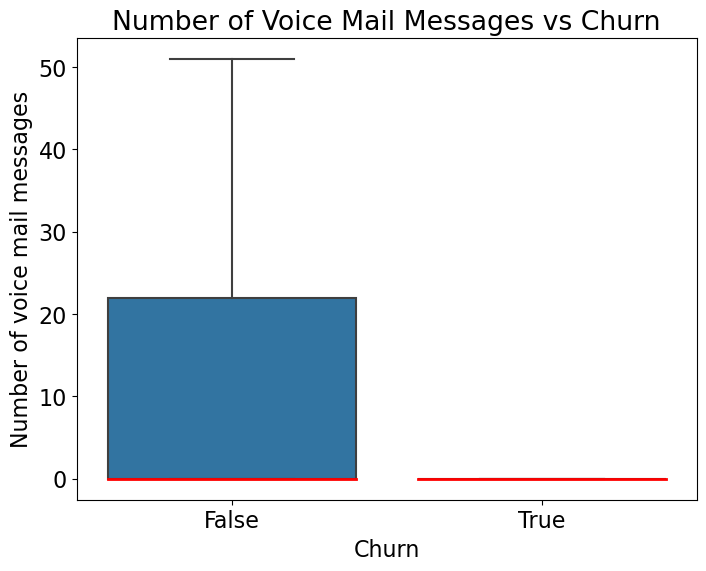

In [21]:
# Plot number of voice mail messages vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Number vmail messages', data=df_copy,
            showfliers=False, medianprops={'color': 'red', 'linewidth': 2})
plt.xlabel('Churn')
plt.ylabel('Number of voice mail messages')
plt.title('Number of Voice Mail Messages vs Churn')
plt.show()

In [22]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Number vmail messages']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Number vmail messages']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 30.29845966951284
P-Value: 3.7041994930447e-08
Reject null hypothesis: There is a significant difference in the distributions.


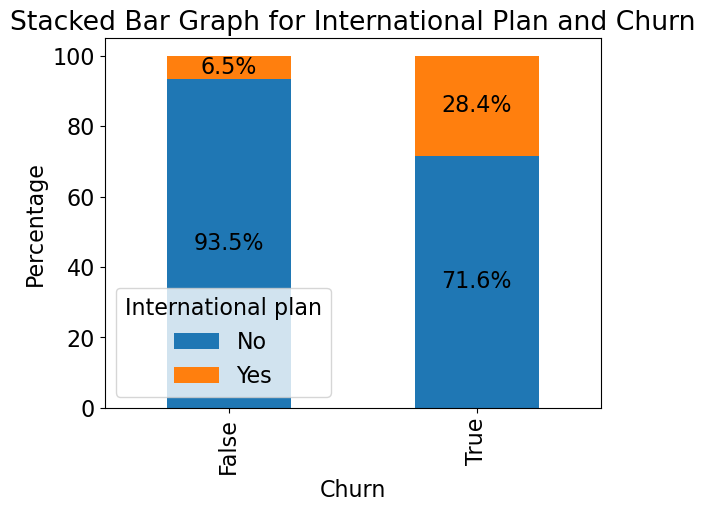

In [23]:
# Group the data by the two variables and calculate the counts
grouped_data = df_copy.groupby(['Churn','International plan']).size().unstack()
grouped_data_percent = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar graph
ax = grouped_data_percent.plot(kind='bar', stacked=True)

# Add labels and a title to the graph
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Stacked Bar Graph for International Plan and Churn')

# Add stack percentages to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Display the graph
plt.show()


In [24]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df_copy['Churn'], df_copy['International plan'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Contingency Table:")
print(contingency_table)
print()
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Contingency Table:
International plan    No  Yes
Churn                        
False               2664  186
True                 346  137

Chi-Square Value: 222.5657566499376
P-Value: 2.4931077033159556e-50
Degrees of Freedom: 1
Expected Frequencies:
[[2573.80738074  276.19261926]
 [ 436.19261926   46.80738074]]


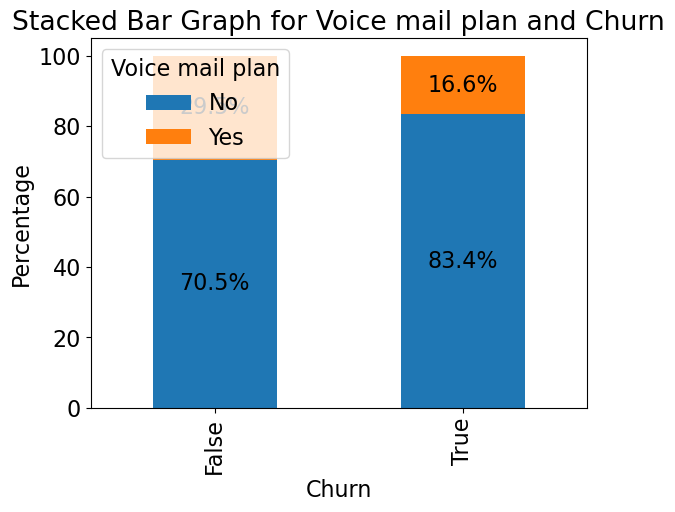

In [25]:
# Group the data by the two variables and calculate the counts
grouped_data = df_copy.groupby(['Churn','Voice mail plan']).size().unstack()
grouped_data_percent = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar graph
ax = grouped_data_percent.plot(kind='bar', stacked=True)

# Add labels and a title to the graph
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Stacked Bar Graph for Voice mail plan and Churn')

# Add stack percentages to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Display the graph
plt.show()


In [26]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df_copy['Churn'], df_copy['Voice mail plan'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Contingency Table:")
print(contingency_table)
print()
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Contingency Table:
Voice mail plan    No  Yes
Churn                     
False            2008  842
True              403   80

Chi-Square Value: 34.13166001075673
P-Value: 5.15063965903898e-09
Degrees of Freedom: 1
Expected Frequencies:
[[2061.61116112  788.38883888]
 [ 349.38883888  133.61116112]]


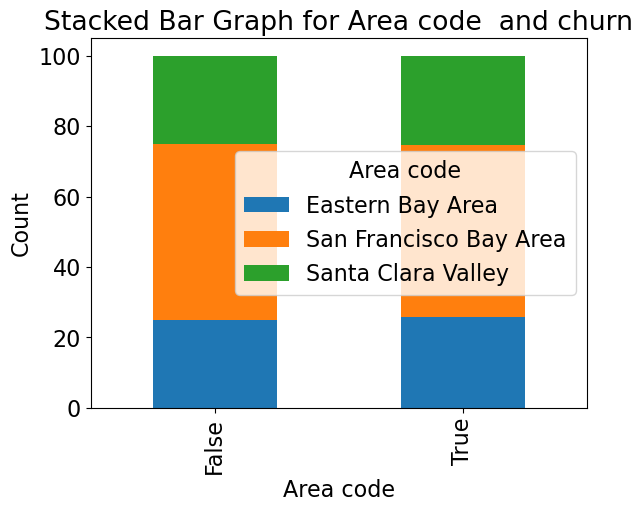

In [27]:
# Group the data by the two variables and calculate the counts
grouped_data = df_copy.groupby(['Churn', 'Area code']).size().unstack()
grouped_data_percent = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar graph
grouped_data_percent.plot(kind='bar', stacked=True)

# Add labels and a title to the graph
plt.xlabel('Area code')
plt.ylabel('Count')
plt.title('Stacked Bar Graph for Area code  and churn')

# Display the graph
plt.show()


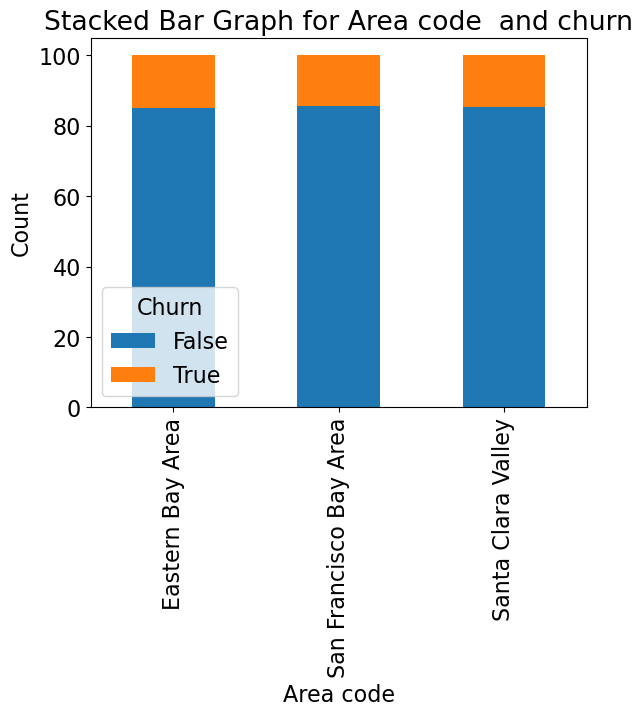

In [28]:
# Group the data by the two variables and calculate the counts
grouped_data = df_copy.groupby(['Area code', 'Churn']).size().unstack()
grouped_data_percent = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar graph
grouped_data_percent.plot(kind='bar', stacked=True)

# Add labels and a title to the graph
plt.xlabel('Area code')
plt.ylabel('Count')
plt.title('Stacked Bar Graph for Area code  and churn')

# Display the graph
plt.show()


In [29]:
# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df_copy['Churn'], df_copy['Area code'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Contingency Table:")
print(contingency_table)
print()
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Contingency Table:
Area code  Eastern Bay Area  San Francisco Bay Area  Santa Clara Valley
Churn                                                                  
False                   715                    1419                 716
True                    125                     236                 122

Chi-Square Value: 0.17754069117425395
P-Value: 0.9150556960243712
Degrees of Freedom: 2
Expected Frequencies:
[[ 718.27182718 1415.16651665  716.56165617]
 [ 121.72817282  239.83348335  121.43834383]]


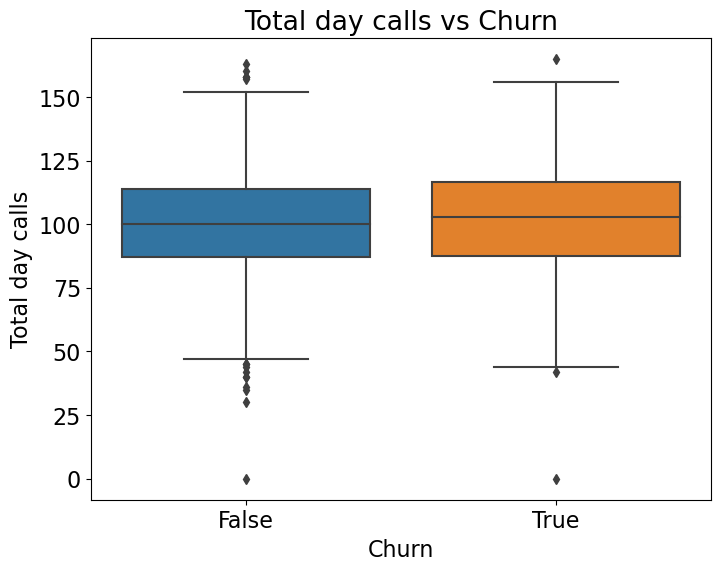

In [30]:
# Plot Total day calls vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total day calls', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total day calls')
plt.title('Total day calls vs Churn')
plt.show()

In [31]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total day calls']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total day calls']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 2.306655735556683
P-Value: 0.12882094496153282
Fail to reject null hypothesis: There is no significant difference in the distributions.


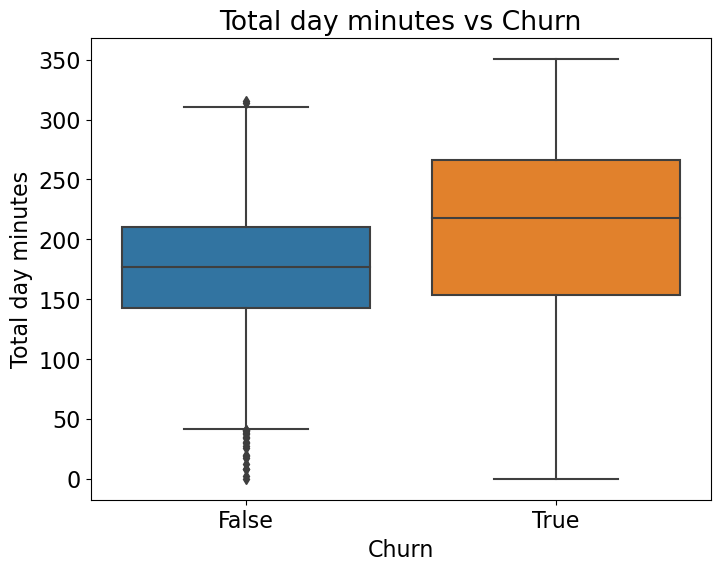

In [32]:
# Plot Total day minutes vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total day minutes', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total day minutes')
plt.title('Total day minutes vs Churn')
plt.show()

In [33]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total day minutes']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total day minutes']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 97.06367023357978
P-Value: 6.713345103395466e-23
Reject null hypothesis: There is a significant difference in the distributions.


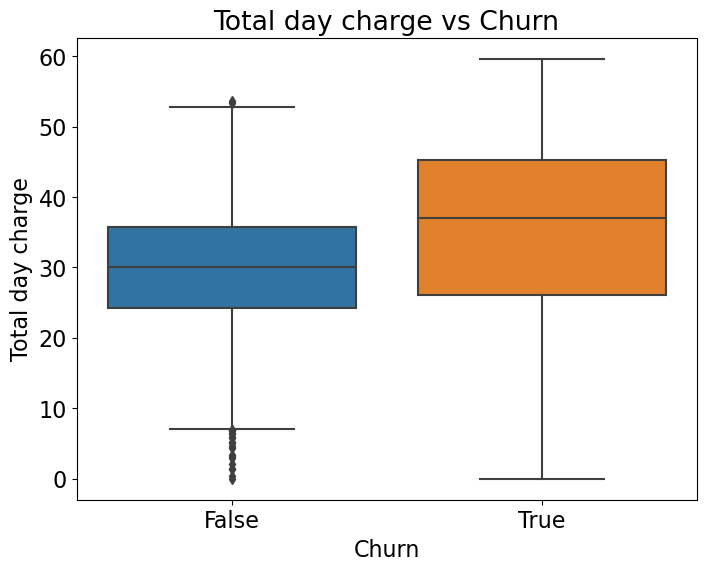

In [34]:
# Plot total day charge vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total day charge', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total day charge')
plt.title('Total day charge vs Churn')
plt.show()

In [35]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total day charge']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total day charge']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 97.06367023357978
P-Value: 6.713345103395466e-23
Reject null hypothesis: There is a significant difference in the distributions.


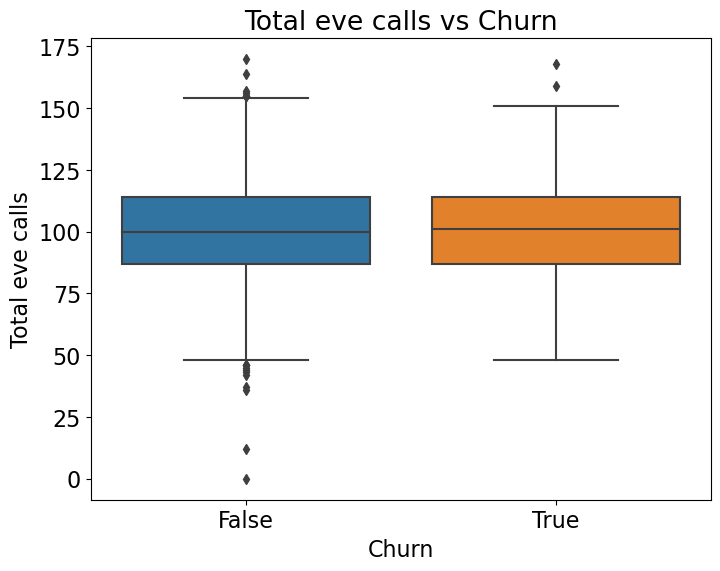

In [36]:
# Plot Total eve calls vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total eve calls', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total eve calls')
plt.title('Total eve calls vs Churn')
plt.show()

In [37]:
from scipy.stats import kruskal

# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total eve calls']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total eve calls']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 0.24519169980184116
P-Value: 0.6204812862939364
Fail to reject null hypothesis: There is no significant difference in the distributions.


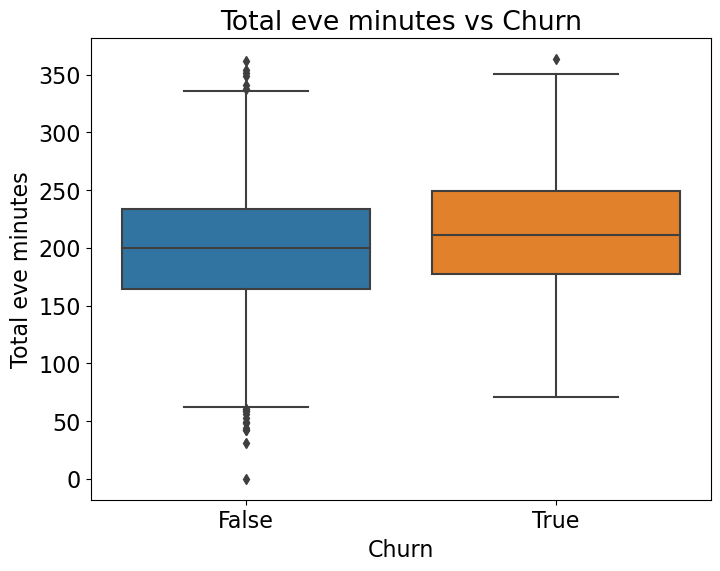

In [38]:
# Plot total eve minutes vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total eve minutes', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total eve minutes')
plt.title('Total eve minutes vs Churn')
plt.show()

In [39]:
from scipy.stats import kruskal

# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total eve minutes']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total eve minutes']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 26.151052862654737
P-Value: 3.1572491180293143e-07
Reject null hypothesis: There is a significant difference in the distributions.


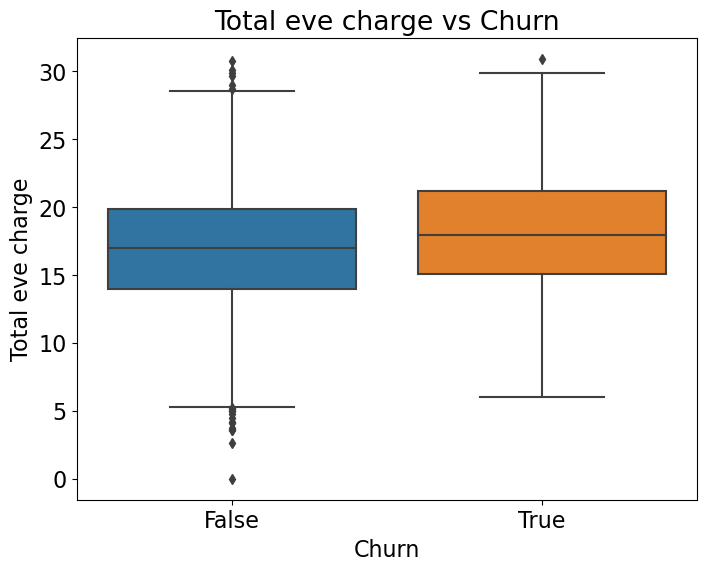

In [40]:
# Plot Total eve charge vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total eve charge', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total eve charge')
plt.title('Total eve charge vs Churn')
plt.show()

In [41]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total eve charge']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total eve charge']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 26.14452781864508
P-Value: 3.1679361151593014e-07
Reject null hypothesis: There is a significant difference in the distributions.


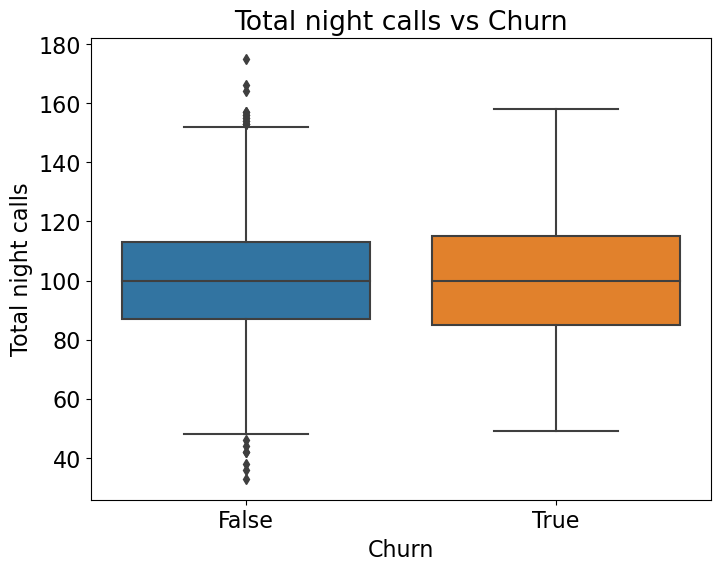

In [42]:
# Plot Total night calls  vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total night calls', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total night calls')
plt.title('Total night calls vs Churn')
plt.show()

In [43]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total night calls']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total night calls']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 0.07342371733931646
P-Value: 0.7864155585173394
Fail to reject null hypothesis: There is no significant difference in the distributions.


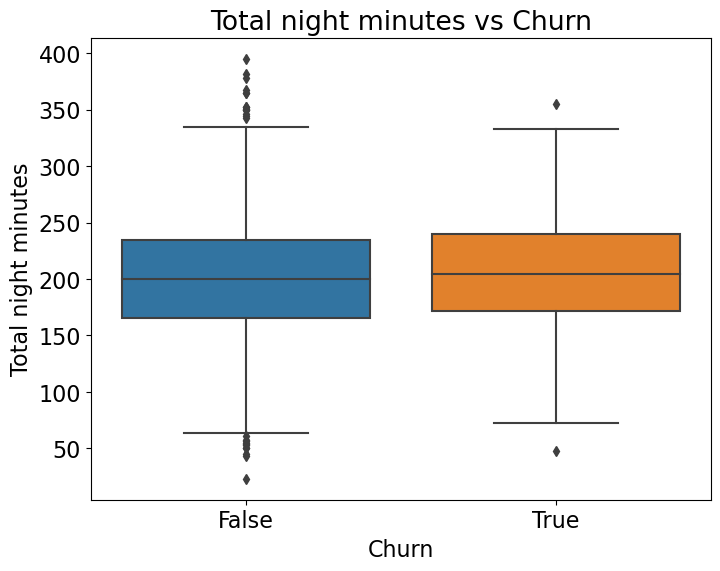

In [44]:
# Plot Total night minutes vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total night minutes', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total night minutes')
plt.title('Total night minutes vs Churn')
plt.show()

In [45]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total night minutes']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total night minutes']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 3.9298035388284256
P-Value: 0.04743748583443136
Reject null hypothesis: There is a significant difference in the distributions.


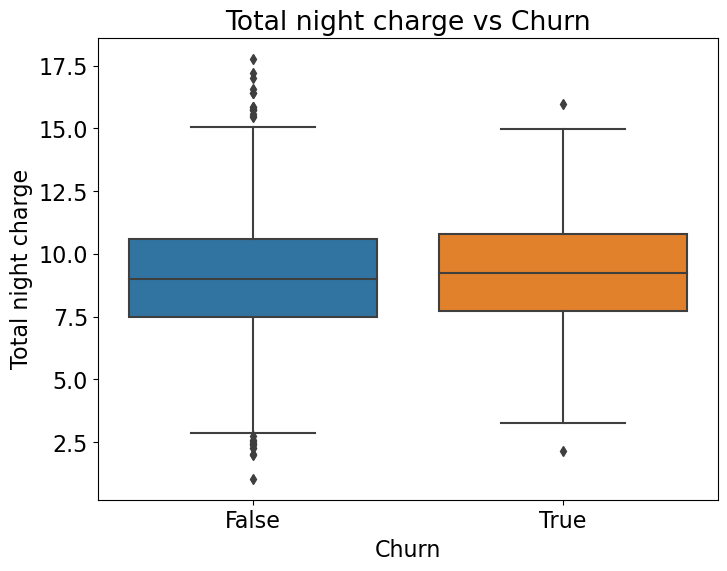

In [46]:
# Plot Total night charges  vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total night charge', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total night charge')
plt.title('Total night charge vs Churn')
plt.show()

In [47]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total night charge']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total night charge']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 3.9322462347251905
P-Value: 0.047368634016801664
Reject null hypothesis: There is a significant difference in the distributions.


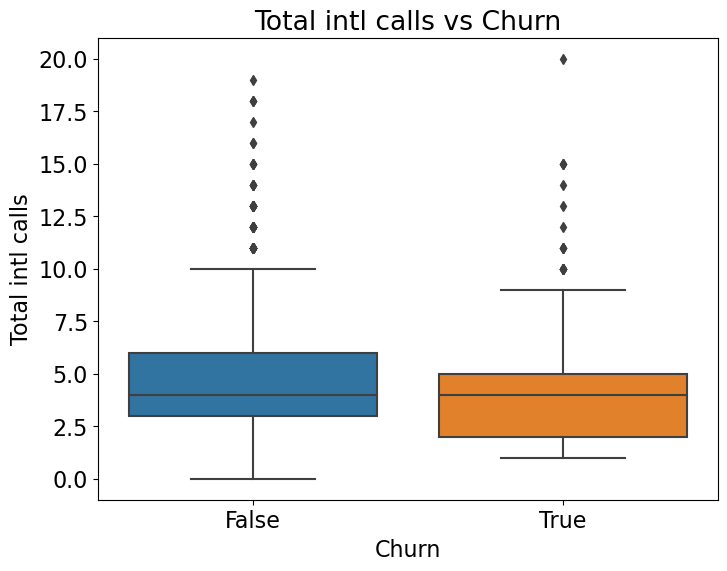

In [48]:
# Plot Total intl calls vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total intl calls', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total intl calls')
plt.title('Total intl calls vs Churn')
plt.show()

In [49]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total intl calls']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total intl calls']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 18.621935451714823
P-Value: 1.5937615316144818e-05
Reject null hypothesis: There is a significant difference in the distributions.


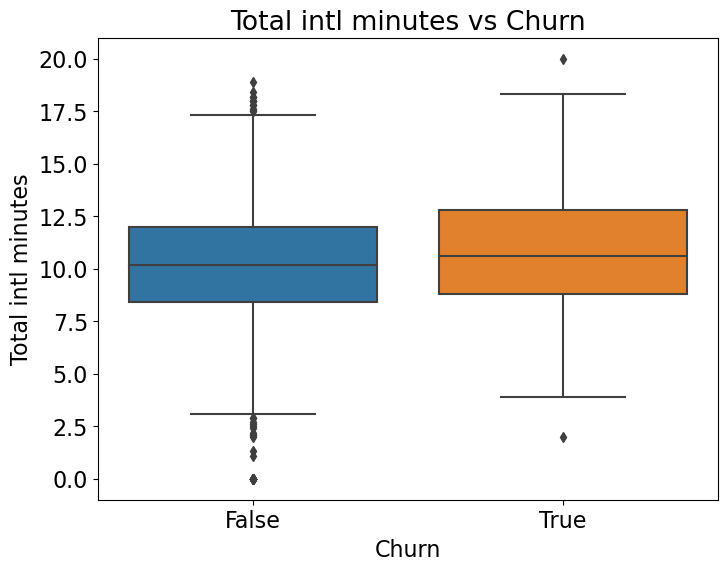

In [50]:
# Plot Total intl minutes vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total intl minutes', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total intl minutes')
plt.title('Total intl minutes vs Churn')
plt.show()

In [51]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total intl minutes']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total intl minutes']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 12.337615531595393
P-Value: 0.00044392168726056617
Reject null hypothesis: There is a significant difference in the distributions.


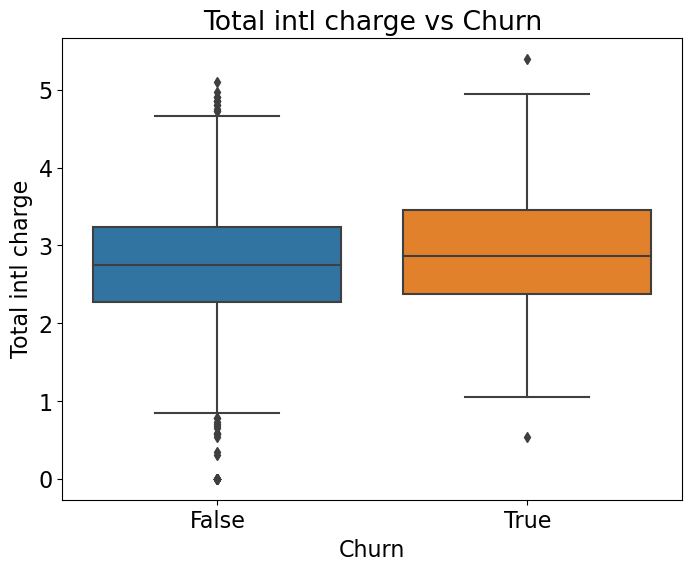

In [52]:
# Plot Total intl charge vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total intl charge', data=df_copy)
plt.xlabel('Churn')
plt.ylabel('Total intl charge')
plt.title('Total intl charge vs Churn')
plt.show()

In [53]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Total intl charge']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Total intl charge']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 12.337615531595393
P-Value: 0.00044392168726056617
Reject null hypothesis: There is a significant difference in the distributions.


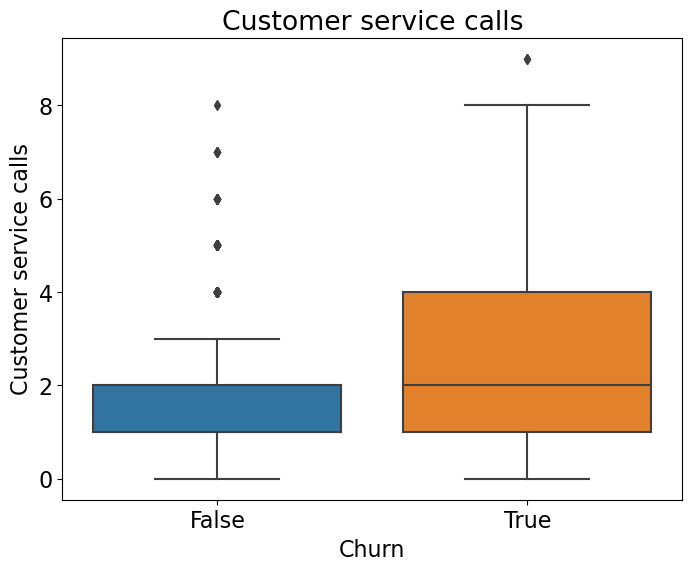

In [54]:
# Plot account length vs churn using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Customer service calls', data=df)
plt.xlabel('Churn')
plt.ylabel('Customer service calls')
plt.title('Customer service calls')
plt.show()

In [55]:
# Separate the continuous variable(s) by the levels of 'Churn'
continuous_var_churn_true = df_copy[df_copy['Churn'] == True]['Customer service calls']
continuous_var_churn_false = df_copy[df_copy['Churn'] == False]['Customer service calls']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_churn_true, continuous_var_churn_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")


Kruskal-Wallis Statistic: 62.225233069050155
P-Value: 3.0633747803599894e-15
Reject null hypothesis: There is a significant difference in the distributions.


In [56]:
# Specify the columns containing 'yes' and 'no' values that you want to encode
columns_to_encode = ['International plan', 'Voice mail plan']  # Add the actual column names here

# Use the replace() method to encode 'yes' as 1 and 'no' as 0 for each specified column
df_copy[columns_to_encode] = df_copy[columns_to_encode].replace({'Yes': 1, 'No': 0})


In [57]:
# Perform one-hot encoding for the "Area code" variable
Area_code_dummies = pd.get_dummies(df_copy['Area code'], prefix='Area_')

# Concatenate the dummy variables with the original DataFrame
df_encoded = pd.concat([df_copy, Area_code_dummies], axis=1)

# Drop the original "area code" column if needed
df_encoded.drop(columns=['Area code'], inplace=True)


In [58]:
# encoding response variable
df_encoded['Churn'] = df_encoded['Churn'].replace({'True': 1, 'False': 0})

# Convert the data type of the specified columns to numeric (int)
df_encoded['Churn'] = df_encoded['Churn'].astype(int)


In [59]:
# Separate categorical and continuous variables
categorical_vars = df_copy[['International plan', 'Voice mail plan','Area code' ]]
continuous_vars = df_copy[list(set(df_copy.columns)-set(categorical_vars))]

In [60]:
# Drop the response variable from the continuous data
continuous_vars = continuous_vars.drop(columns=["Churn"])
continuous_vars


,Total eve calls,Total intl calls,Total night calls,Total eve minutes,Total day minutes,Total eve charge,Customer service calls,Number vmail messages,Total intl charge,Total night minutes,Total night charge,Total intl minutes,Total day calls,Account length,Total day charge
0,99,3,91,197.4,265.1,16.78,1,25,2.70,244.7,11.01,10.0,110,128,45.07
1,103,3,103,195.5,161.6,16.62,1,26,3.70,254.4,11.45,13.7,123,107,27.47
2,110,5,104,121.2,243.4,10.30,0,0,3.29,162.6,7.32,12.2,114,137,41.38
3,88,7,89,61.9,299.4,5.26,2,0,1.78,196.9,8.86,6.6,71,84,50.90
4,122,3,121,148.3,166.7,12.61,3,0,2.73,186.9,8.41,10.1,113,75,28.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,125,7,94,155.7,137.1,13.23,2,26,3.11,247.6,11.14,11.5,88,114,23.31
663,131,3,73,203.9,83.6,17.33,1,29,2.19,229.5,10.33,8.1,131,106,14.21
664,110,8,134,85.0,193.9,7.23,3,0,3.56,210.1,9.45,13.2,118,60,32.96
665,105,4,82,197.7,169.8,16.80,1,0,3.13,193.7,8.72,11.6,114,159,28.87


In [61]:
# Separate the target variable (binary response) and the features
y = df_encoded['Churn']  
X = df_encoded.drop(columns=['Churn'])  

# Create a LogisticRegression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X, y)

# Get the coefficients of the logistic regression model
coefficients = logreg.coef_[0]

# Calculate the VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)


                        Variable           VIF
0                 Account length  1.004597e+00
1             International plan  1.010746e+00
2                Voice mail plan  1.190485e+01
3          Number vmail messages  1.190402e+01
4              Total day minutes  1.048045e+07
5                Total day calls  1.004761e+00
6               Total day charge  1.048046e+07
7              Total eve minutes  2.240730e+06
8                Total eve calls  1.002647e+00
9               Total eve charge  2.240731e+06
10           Total night minutes  6.389437e+05
11             Total night calls  1.004145e+00
12            Total night charge  6.389424e+05
13            Total intl minutes  6.912939e+04
14              Total intl calls  1.004878e+00
15             Total intl charge  6.912942e+04
16        Customer service calls  1.003586e+00
17        Area__Eastern Bay Area  3.670712e+01
18  Area__San Francisco Bay Area  7.224043e+01
19      Area__Santa Clara Valley  3.638508e+01


C:\Users\Gayani Pathirana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


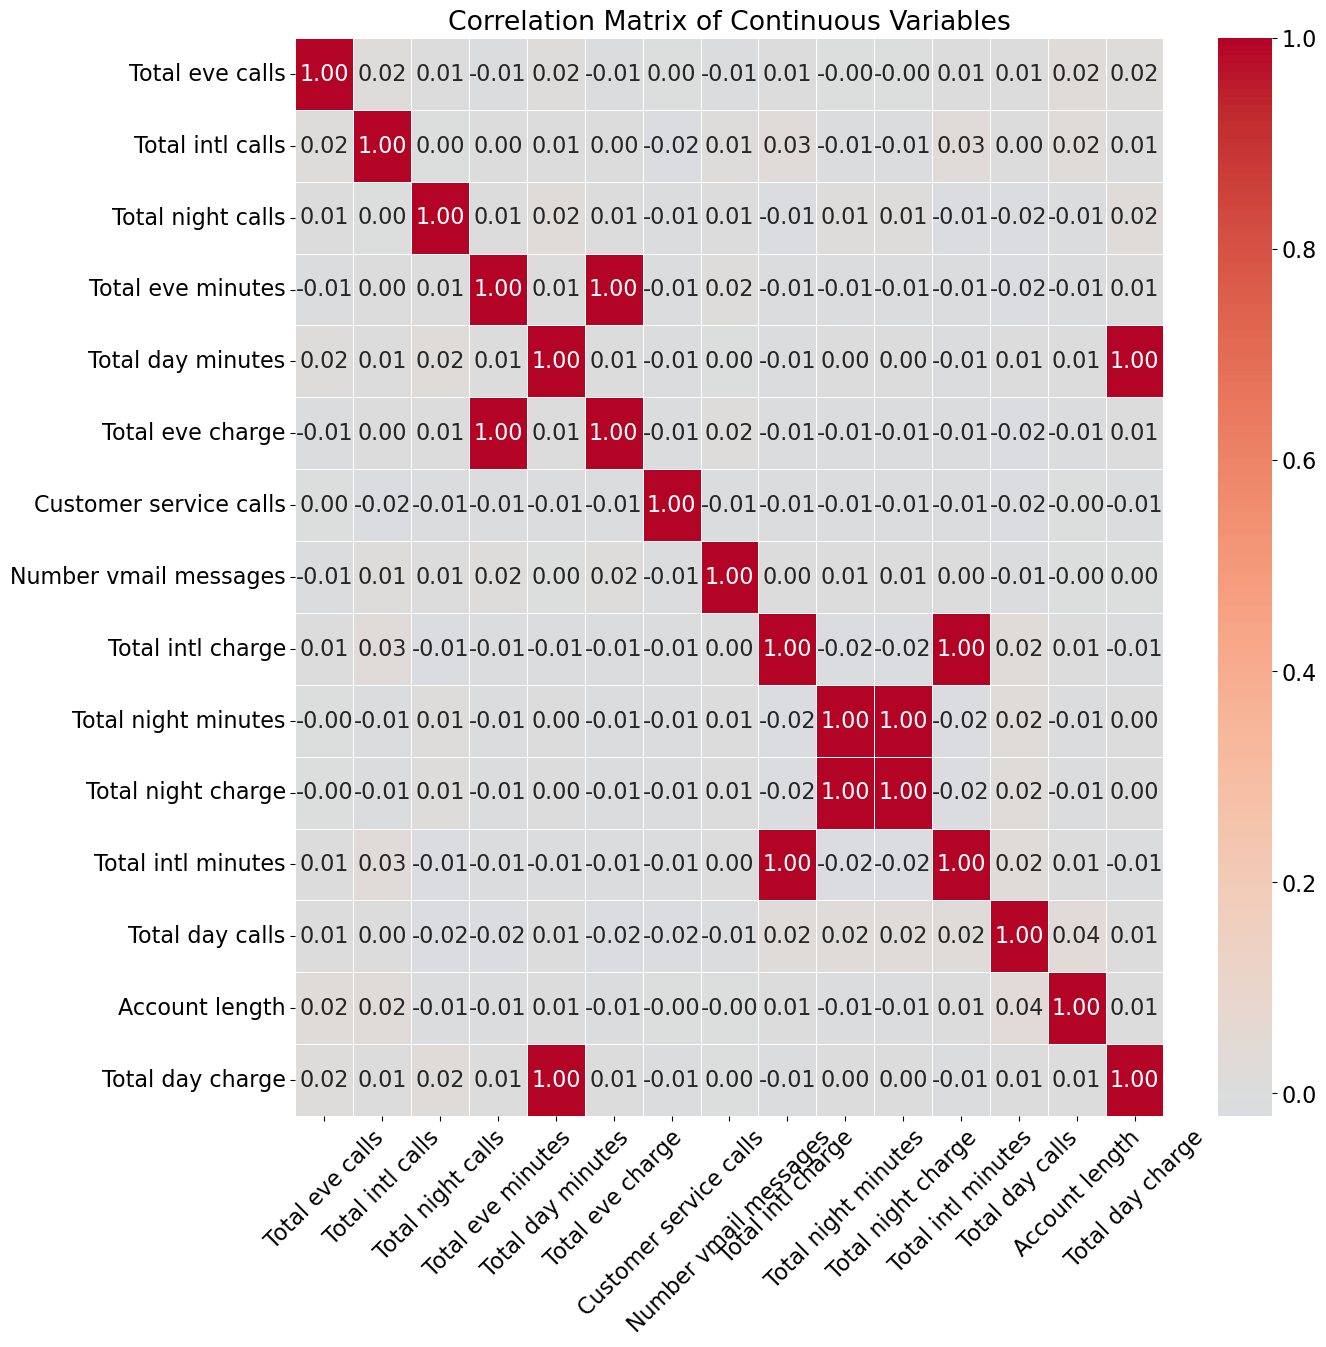

In [71]:
# Correlation plot for continuous variables

# Calculate the correlation matrix
correlation_matrix = continuous_vars.corr()

# Create a heatmap using Seaborn with improved visibility
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [62]:
# Scale the input features (X)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the target variable (y)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Create a new DataFrame with the scaled features and target variable
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Churn'] = y_scaled.flatten()


In [63]:
# Initialize the PLS-DA model
plsda = PLSRegression(n_components=2)

# Fit the PLS-DA model on the scaled data
plsda.fit(X_scaled, y_scaled)

# Transform the original features into the PLS-DA space
X_plsda = plsda.transform(X_scaled)

# Create a DataFrame to store the PLS-DA transformed features
df_plsda = pd.DataFrame(X_plsda, columns=['PLS Component 1', 'PLS Component 2'])
df_plsda['Churn'] = y_scaled.flatten()



In [64]:
# Assuming X_scaled is your scaled predictor data
# Calculate the covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False)

# Perform eigendecomposition
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Print the eigenvalues
print("Eigenvalues:", eigenvalues_sorted)


Eigenvalues: [ 2.05067999e+00  2.03816396e+00  2.01949317e+00  1.98999535e+00
  1.91883488e+00  1.63668931e+00  1.34931175e+00  1.06821409e+00
  1.02507715e+00  1.00636023e+00  9.83587583e-01  9.72392271e-01
  9.63267188e-01  9.40969232e-01  4.29579602e-02  7.23667287e-06
  7.83283573e-07  2.23202941e-07  4.77204665e-08 -1.11472454e-15]


In [65]:
# Assuming 'eigenvalues' contains the eigenvalues of the covariance matrix
# Replace this with the actual eigenvalues

# Calculate the total variance (sum of eigenvalues)
total_variance = np.sum(eigenvalues_sorted)

# Calculate the explained variance percentage for each component
explained_variance_percent = [(eig / total_variance) * 100 for eig in eigenvalues_sorted]

# Print the explained variance percentages for each component
for i, variance_percent in enumerate(explained_variance_percent):
    print(f"Explained Variance for Component {i + 1}: {variance_percent:.2f}%")


Explained Variance for Component 1: 10.25%
Explained Variance for Component 2: 10.19%
Explained Variance for Component 3: 10.09%
Explained Variance for Component 4: 9.95%
Explained Variance for Component 5: 9.59%
Explained Variance for Component 6: 8.18%
Explained Variance for Component 7: 6.74%
Explained Variance for Component 8: 5.34%
Explained Variance for Component 9: 5.12%
Explained Variance for Component 10: 5.03%
Explained Variance for Component 11: 4.92%
Explained Variance for Component 12: 4.86%
Explained Variance for Component 13: 4.81%
Explained Variance for Component 14: 4.70%
Explained Variance for Component 15: 0.21%
Explained Variance for Component 16: 0.00%
Explained Variance for Component 17: 0.00%
Explained Variance for Component 18: 0.00%
Explained Variance for Component 19: 0.00%
Explained Variance for Component 20: -0.00%


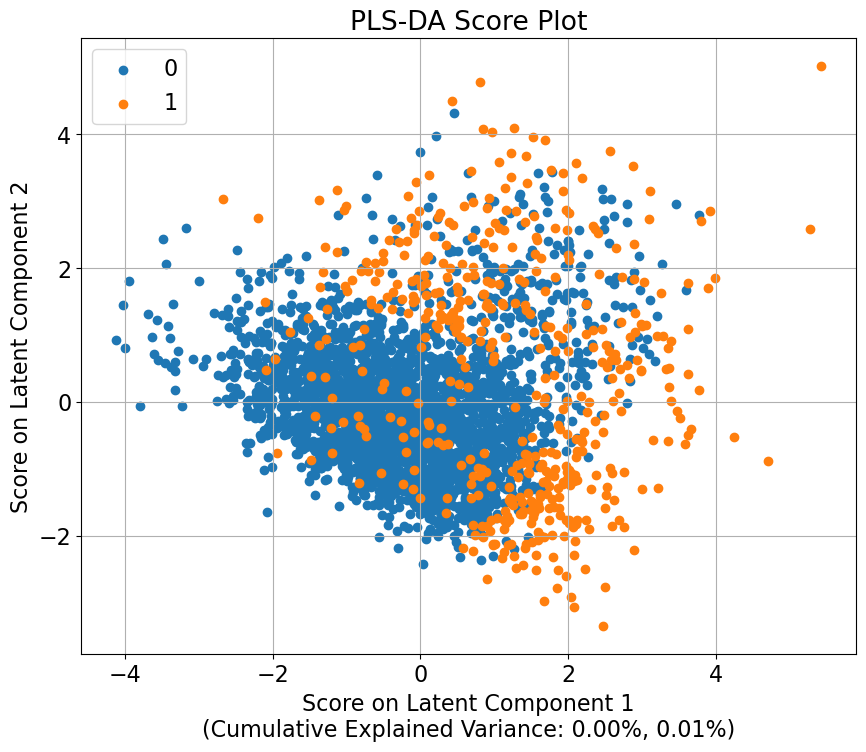

In [69]:
# Assuming you have already fitted the PLS-DA model and transformed the data as shown in the previous step

# Calculate the cumulative sum of squared loadings for the first two components
cumulative_explained_variance = np.cumsum(np.square(plsda.x_scores_[:, 0:2]))

# Calculate the total sum of squared loadings for the first two components
total_variance = np.sum(np.square(plsda.x_scores_[:, 0:2]))

# Calculate the cumulative explained variance as a percentage
cumulative_explained_variance_percentage = (cumulative_explained_variance / total_variance) * 100

# Visualize the score plot for the first two components
plt.figure(figsize=(10, 8))

# Get the unique classes in the target variable
unique_classes = y.unique()

# Plot the scores for each class in a different color
for cls in unique_classes:
    plt.scatter(X_plsda[y == cls, 0], X_plsda[y == cls, 1], label=cls)

# Add cumulative explained variance as a percentage to x-axis label
variance_text = f'Cumulative Explained Variance: {cumulative_explained_variance_percentage[0]:.2f}%, {cumulative_explained_variance_percentage[1]:.2f}%'
plt.xlabel(f'Score on Latent Component 1\n({variance_text})')
plt.ylabel('Score on Latent Component 2')
plt.title('PLS-DA Score Plot')
plt.legend()
plt.grid(True)
plt.show()



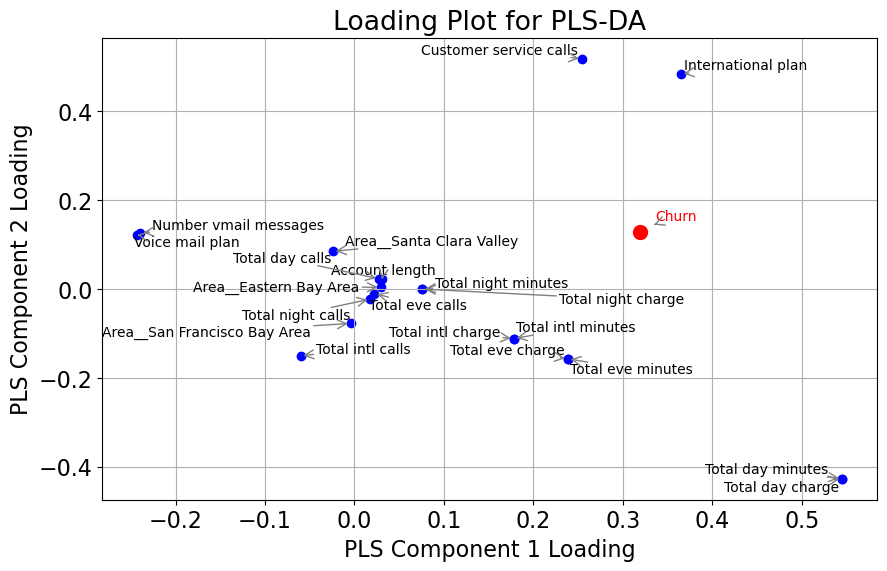

In [66]:

# Assuming X_scaled is a NumPy array and original_data is a DataFrame
# Get the feature names from the original data
feature_names = X.columns

# Get the loadings from the PLS-DA model
loadings = plsda.x_loadings_

# Get the y-loadings from the PLS-DA model
y_loadings = plsda.y_loadings_

# Create a scatter plot of the loadings
plt.figure(figsize=(10, 6))
scatter = plt.scatter(loadings[:, 0], loadings[:, 1], c='b', marker='o')

plt.xlabel('PLS Component 1 Loading')
plt.ylabel('PLS Component 2 Loading')

# Annotate the points with feature names
annotations = []
for i, txt in enumerate(feature_names):
    annotation = plt.annotate(txt, (loadings[i, 0], loadings[i, 1]), fontsize=10, ha='right')
    annotations.append(annotation)

# Plot the Churn variable as a separate red dot
churn_dot = plt.scatter(y_loadings[0, 0], y_loadings[0, 1], c='r', marker='o', s=100)
churn_annotation = plt.annotate('Churn', (y_loadings[0, 0], y_loadings[0, 1]), fontsize=10, ha='right', color='r',
                                xytext=(10, 5), textcoords='offset points')

# Combine all annotations for adjustment
all_annotations = annotations + [churn_annotation]

# Use adjustText to automatically adjust label positions
adjust_text(all_annotations, arrowprops=dict(arrowstyle='->', color='gray'))

plt.title('Loading Plot for PLS-DA')
plt.grid(True)
plt.show()


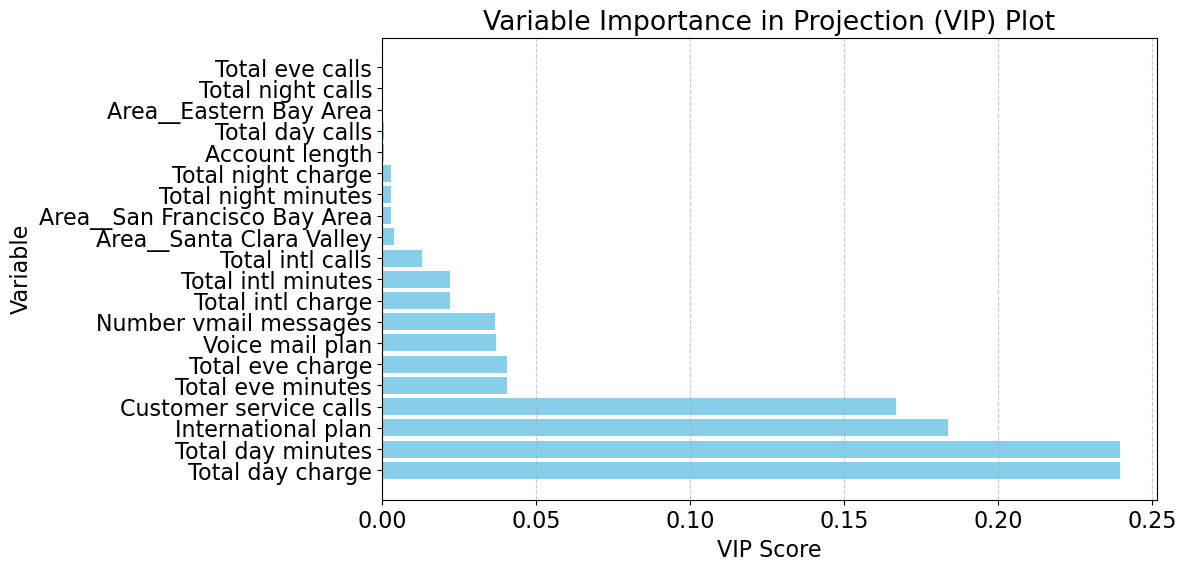

In [68]:
# Calculate VIP scores
n_components = 2  # Number of components used in PLS-DA
n_features = X_scaled.shape[1]  # Number of features

# Initialize VIP scores
vip_scores = np.zeros(n_features)

# Calculate VIP scores for each component
for i in range(n_components):
    w = plsda.x_weights_[:, i]
    c = np.sum(w ** 2)
    vip_scores += (c * (plsda.x_loadings_[:, i] ** 2))

# Normalize VIP scores by dividing by the number of components
vip_scores /= n_components

# Create a DataFrame to store VIP scores and variable names
vip_df = pd.DataFrame({'Variable': X.columns, 'VIP Score': vip_scores})

# Sort VIP scores in descending order
vip_df = vip_df.sort_values(by='VIP Score', ascending=False)

# Create the VIP plot
plt.figure(figsize=(10, 6))
plt.barh(vip_df['Variable'], vip_df['VIP Score'], color='skyblue')
plt.xlabel('VIP Score')
plt.ylabel('Variable')
plt.title('Variable Importance in Projection (VIP) Plot')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

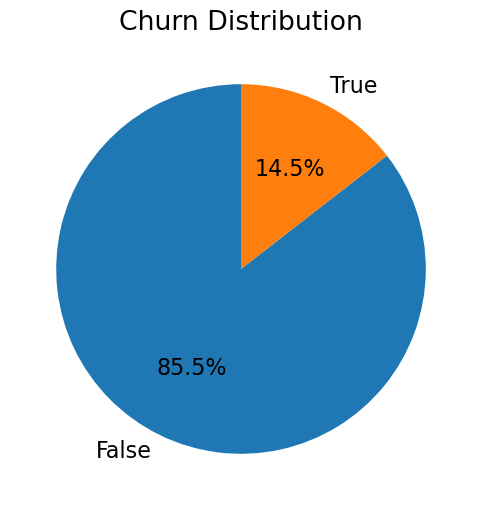

In [70]:
# Calculate the counts of churn values
churn_counts = df_copy['Churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])

# Add a title
plt.title('Churn Distribution')

# Display the pie chart
plt.show()
